# Bài 1: 
Cho bộ dữ liệu với 5 giao dịch của các mặt hàng đã mua như sau:  
 
          [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], 
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], 
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']] 
 
hãy thực hiện các yêu cầu: 
 
### 1.1. Cài đăt thư viện mlxtend trên Colab (!pip install mlxtend) 


In [209]:
# !pip install mlxtend

### 1.2. Đọc dữ liệu ở trên 


In [210]:
data = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
        ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
        ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
        ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
        ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

### 1.3. Mã hóa dữ liệu ở trên 


In [211]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


### 1.4. Sử dụng thư viện mlxtend cho giải thuật Apriori với min_support = 0.6, in ra kết quả 



In [212]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.6)
frequent_itemsets   

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


### 1.5. Chạy lại câu 1.4 sử dụng thêm tính năng use_colnames=True, in ra kết quả 


In [213]:
frequent_itemsets_v1 = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets_v1

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


### 1.6. Lấy kết quả từ câu 1.5 là đầu vào, in ra các kết quả với điều kiện mặt hàng có độ dài >=2 


In [214]:
frequent_itemsets_v1['length'] = frequent_itemsets_v1['itemsets'].apply(lambda x: len(x))
filtered_result = frequent_itemsets_v1[frequent_itemsets_v1['length'] >= 2]
filtered_result

,support,itemsets,length
5,0.8,"(Kidney Beans, Eggs)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Kidney Beans, Milk)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Kidney Beans, Yogurt)",2
10,0.6,"(Eggs, Kidney Beans, Onion)",3


### 1.7. Lấy kết quả từ câu 1.5 là đầu vào, in ra các kết quả với điều kiện mặt hàng có độ dài >=2 và support >= 0.8 

In [215]:
filtered_result_support = frequent_itemsets_v1[(frequent_itemsets_v1['length'] >= 2) & (frequent_itemsets_v1['support'] >= 0.8)]

print("\nKết quả với mặt hàng có độ dài ít nhất là 2 và support ít nhất là 0.8:")
print(filtered_result_support)


Kết quả với mặt hàng có độ dài ít nhất là 2 và support ít nhất là 0.8:
   support              itemsets  length
5      0.8  (Kidney Beans, Eggs)       2


# Bài 2:
Cho bộ dữ liệu như ở dưới đây, hãy thực hiện các yêu cầu sau:


### 2.1. Đọc dữ liệu trong bảng đó


In [216]:
import pandas as pd

data = {
    'Transaction ID': ['T100', 'T200', 'T300', 'T400', 'T500', 'T600', 'T700', 'T800', 'T900'],
    'List of items': ['111, 112, 115', '112, 114', '112, 113', '111, 112, 114', '111, 113', '112, 113', '111, 113', '111, 112, 113, 115', '111, 112, 113']
}

df = pd.DataFrame(data)
df

,Transaction ID,List of items
0,T100,"111, 112, 115"
1,T200,"112, 114"
2,T300,"112, 113"
3,T400,"111, 112, 114"
4,T500,"111, 113"
5,T600,"112, 113"
6,T700,"111, 113"
7,T800,"111, 112, 113, 115"
8,T900,"111, 112, 113"


### 2.2. Mã hóa dữ liệu


In [217]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(df['List of items'].apply(lambda x: x.split(', '))).transform(df['List of items'].apply(lambda x: x.split(', ')))
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)
encoded_df.head()

,111,112,113,114,115
0,True,True,False,False,True
1,False,True,False,True,False
2,False,True,True,False,False
3,True,True,False,True,False
4,True,False,True,False,False


### 2.3. Sử dụng thư viện mlxtend cho giải thuật FPgrowth với min_support = 0.6, in ra kết quả


In [218]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(encoded_df,min_support=0.6)
frequent_itemsets

,support,itemsets
0,0.777778,(1)
1,0.666667,(0)
2,0.666667,(2)


### 2.4. Chạy lại câu 2.3 sử dụng thêm tính năng use_colnames=True, in ra kết quả


In [219]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_v2 = fpgrowth(encoded_df, min_support=0.6, use_colnames=True)
frequent_itemsets_v2

,support,itemsets
0,0.777778,(112)
1,0.666667,(111)
2,0.666667,(113)


### 2.5. Lấy kết quả từ câu 2.4 là đầu vào, in ra các kết quả với điều kiện mặt hàng có chữ 2 ký tự cuối có giá trị >=13

In [220]:


filtered_result = frequent_itemsets_v2[frequent_itemsets_v2['itemsets'].apply(lambda x: any(int(item[-2:]) >= 13 for item in list(x)))]

print(filtered_result)

    support itemsets
2  0.666667    (113)


# Bài 3: 
Trong bài tập này, ta sẽ khai thác các tập phổ biến (frequent itemset) trên tập dữ liệu 
Plants (sự phân bố của một số loài thực vật ở khu vực Mỹ và Canada) sử dụng ứng 
dụng Weka. 


### 3.1.  Đọc dữ liệu Plants trên Colab, hiển thị một số thông tin cơ bản như: 
    - Tổng số các loài cây 
    - Số lượng vùng phân bố 
    - Vùng phân bố có ít loài cây nhất 
    - Vùng phân bố có nhiều loài cây nhất 
    - Số loài cây trung bình phân bố trên từng vùng 


In [221]:
df_v3 = pd.read_csv("plants.csv", encoding='latin1')
df_v3.head()

,name,co,dengl,ca,ga,ct,pr,lb,tx,la,...,fl,wy,on,ok,oh,sk,sc,ky,or,sd
0,abelia,n,n,n,n,n,n,n,n,n,...,y,n,n,n,n,n,n,n,n,n
1,abelia x grandiflora,n,n,n,n,n,n,n,n,n,...,y,n,n,n,n,n,n,n,n,n
2,abelmoschus,n,n,n,n,y,y,n,n,y,...,y,n,n,n,n,n,y,y,n,n
3,abelmoschus esculentus,n,n,n,n,y,y,n,n,y,...,y,n,n,n,n,n,y,y,n,n
4,abelmoschus moschatus,n,n,n,n,n,y,n,n,n,...,n,n,n,n,n,n,n,n,n,n


In [222]:
df_v3 = df_v3.drop(columns='name').applymap(lambda x: 1 if x == 'y' else 0)


C:\Users\kytra\AppData\Local\Temp\ipykernel_15084\2874936177.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_v3 = df_v3.drop(columns='name').applymap(lambda x: 1 if x == 'y' else 0)


In [223]:
total_species = df.shape[0]
print("Tổng số loài cây: ", total_species)

Tổng số loài cây:  9


In [224]:
total_regions = df_v3.shape[1] - 1
print("Tổng số vùng: ", total_regions)

Tổng số vùng:  68


In [225]:
species_per_region = df_v3.sum()
print("Số loài cây trên mỗi vùng: ")
species_per_region


Số loài cây trên mỗi vùng: 


co        5465
dengl      479
ca       11676
ga        5942
ct        4391
         ...  
sk        2846
sc        5432
ky        4555
or        7028
sd        3185
Length: 69, dtype: int64

In [226]:
min_species_region = species_per_region.idxmin()
print("Vùng có ít loài cây nhất: ", min_species_region)

Vùng có ít loài cây nhất:  pa


In [227]:
max_species_region = species_per_region.idxmax()
print("Vùng có nhiều loài cây nhất: ", max_species_region)

Vùng có nhiều loài cây nhất:  ca


In [228]:

average_species_per_region = species_per_region.mean()
print("Số loài cây trung bình trên mỗi vùng: ", average_species_per_region)

Số loài cây trung bình trên mỗi vùng:  4346.869565217391


### 3.3. Viết đoạn code trên Colab để mã hóa dữ liệu ở trên, lưu kết quả vào 1 file (hint: cần chuyển sang dạng nhị phân để có thể thao tác trên Weka). 

In [229]:
df_v3.head()

,co,dengl,ca,ga,ct,pr,lb,tx,la,tn,...,fl,wy,on,ok,oh,sk,sc,ky,or,sd
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
df_v3.to_csv("plants_encoded.csv", index=False)

### 3.6. Nhận xét về các kết quả 3.4 và 3.5, vẽ biểu đồ trực quan để so sánh, đánh giá kết quả của 2 thuật toán này trên Colab. 

- Từ 3_4.txt:

    - Có tổng cộng 10 quy tắc được liệt kê.
    - Các quy tắc này đều có độ tin cậy (confidence) rất cao (tất cả đều là 1), cho thấy mối quan hệ giữa các mục là rất chặt chẽ.
    - Các giá trị lift đều gần bằng 1, cho thấy sự liên kết giữa các mục không đáng kể so với mức ngẫu nhiên.
    - Các giá trị conv (conviction) đều rất cao, cho thấy mức độ tin cậy của luật.
- Từ 3_5.txt:

    - Cũng có tổng cộng 10 quy tắc được liệt kê.
    - Tất cả các quy tắc đều có độ tin cậy cao (từ 0.98 đến 0.99).
    - Lift cao hơn so với 3_4.txt, cho thấy mối quan hệ giữa các mục có ý nghĩa hơn so với mức ngẫu nhiên.
    - Conviction thấp hơn so với 3_4.txt, nhưng vẫn đủ cao để đảm bảo tính tin cậy của luật.

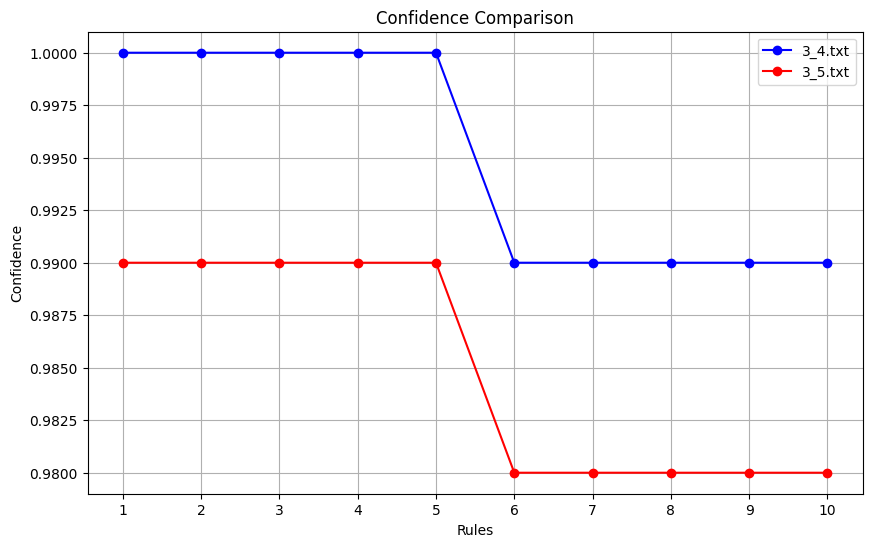

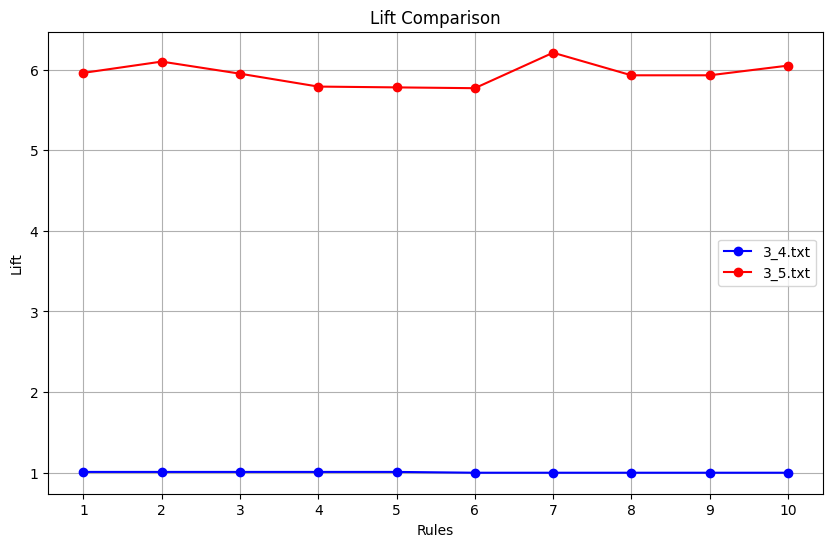

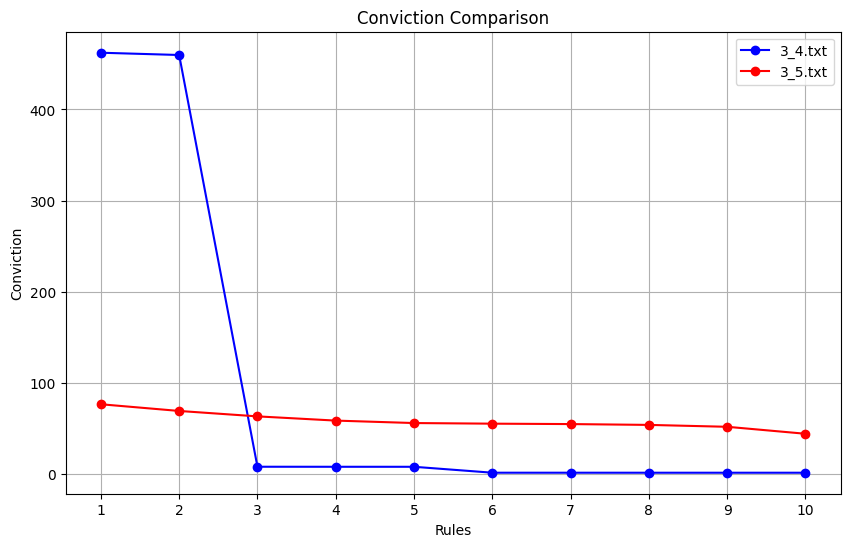

In [231]:
import matplotlib.pyplot as plt

conf_3_4 = [1, 1, 1, 1, 1, 0.99, 0.99, 0.99, 0.99, 0.99]
lift_3_4 = [1.01, 1.01, 1.01, 1.01, 1.01, 1, 1, 1, 1, 1]
conv_3_4 = [462.34, 459.84, 7.53, 7.49, 7.48, 0.98, 0.97, 0.96, 0.96, 0.96]

conf_3_5 = [0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98]
lift_3_5 = [5.96, 6.1, 5.95, 5.79, 5.78, 5.77, 6.21, 5.93, 5.93, 6.05]
conv_3_5 = [76.17, 68.81, 62.86, 58.22, 55.53, 54.85, 54.4, 53.49, 51.42, 43.76]

rules = range(1, 11)

plt.figure(figsize=(10, 6))

plt.plot(rules, conf_3_4, marker='o', label='3_4.txt', color='blue')
plt.plot(rules, conf_3_5, marker='o', label='3_5.txt', color='red')

plt.title('Confidence Comparison')
plt.xlabel('Rules')
plt.ylabel('Confidence')
plt.xticks(rules)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(rules, lift_3_4, marker='o', label='3_4.txt', color='blue')
plt.plot(rules, lift_3_5, marker='o', label='3_5.txt', color='red')

plt.title('Lift Comparison')
plt.xlabel('Rules')
plt.ylabel('Lift')
plt.xticks(rules)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(rules, conv_3_4, marker='o', label='3_4.txt', color='blue')
plt.plot(rules, conv_3_5, marker='o', label='3_5.txt', color='red')

plt.title('Conviction Comparison')
plt.xlabel('Rules')
plt.ylabel('Conviction')
plt.xticks(rules)
plt.legend()
plt.grid(True)
plt.show()


# END